## Module 2, Step 2 : Create Binary Classification Model
### Import Library

In [38]:
import tensorflow as tf
import json, sys
import matplotlib.pyplot as plt
# sys.path.append("/usr/grading")
# import grad

### Read Credential

In [39]:
f = open("trainer-userdata.json")
data = json.load(f)
usermail = data["email"]

### Prepare Dataset

In [40]:
base_dir = "./dataset"

In [55]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.2,
    fill_mode= 'wrap',

)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.2,
    fill_mode= 'wrap',
)

In [56]:
img_shape = (200, 200, 3)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=20,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=5,
    subset='validation')

Found 200 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### DNN Model

Add more layers if you want to!

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [57]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=img_shape, strides=(2,2)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4232)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4232)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

### Model Training

In [19]:
# Cek Available RAM terlebih dahulu
!free -h

              total        used        free      shared  buff/cache   available
Mem:           3,9G        3,1G        546M         30M        258M        605M
Swap:          1,9G        1,7G        227M


In [18]:
# Jalankan kode ini ketika terjadi ResourceExhaustError
!echo "upi123" | sudo -S -k sh -c 'echo 3 > /proc/sys/vm/drop_caches' 

[sudo] password for trainercv: 

In [60]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator, 
                      epochs = 20, 
                      validation_data = validation_generator, 
                      verbose = 1)

Epoch 1/20
10/10 [==============================] - 3s 222ms/step - loss: 99.1721 - accuracy: 0.1850 - val_loss: 10.2238 - val_accuracy: 0.3800
Epoch 2/20
10/10 [==============================] - 3s 256ms/step - loss: 11.5706 - accuracy: 0.3150 - val_loss: 4.6449 - val_accuracy: 0.3800
Epoch 3/20
10/10 [==============================] - 2s 243ms/step - loss: 4.9749 - accuracy: 0.4300 - val_loss: 2.1424 - val_accuracy: 0.4200
Epoch 4/20
10/10 [==============================] - 2s 198ms/step - loss: 2.0732 - accuracy: 0.4850 - val_loss: 1.3162 - val_accuracy: 0.6000
Epoch 5/20
10/10 [==============================] - 2s 206ms/step - loss: 1.5092 - accuracy: 0.5400 - val_loss: 1.5130 - val_accuracy: 0.6000
Epoch 6/20
10/10 [==============================] - 2s 203ms/step - loss: 1.3456 - accuracy: 0.5050 - val_loss: 1.3061 - val_accuracy: 0.5800
Epoch 7/20
10/10 [==============================] - 2s 190ms/step - loss: 1.1785 - accuracy: 0.6000 - val_loss: 1.3376 - val_accuracy: 0.5800
Epo

### Model Evaluation

In [61]:
stats = model.evaluate(validation_generator)
print(f'Accuracy test = {stats[1]*100}%\nLoss test = {stats[0]*100}%')

10/10 [==============================] - 0s 17ms/step - loss: 0.8238 - accuracy: 0.7000
Accuracy test = 69.9999988079071%
Loss test = 82.37695097923279%


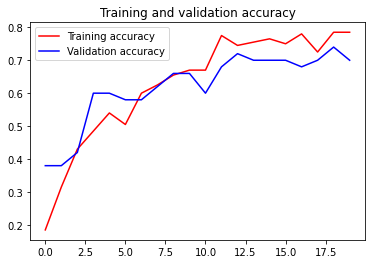

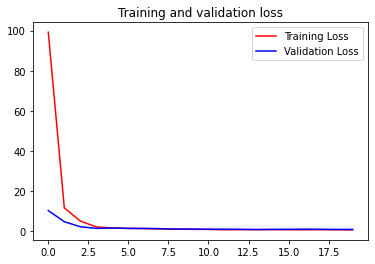

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [63]:
validation_generator.class_indices

{'black': 0,
 'blue': 1,
 'brown': 2,
 'green': 3,
 'grey': 4,
 'orange': 5,
 'red': 6,
 'violet': 7,
 'white': 8,
 'yellow': 9}

### Model Saving

In [64]:
model.save('model_module-3.h5')

### Grading

In [ ]:
# DON'T EDIT THIS
# RUN ONLY ONE TIME AFTER YOU FINISH ALL THE CELLS ABOVE
grad.doGrade(usermail, 1, 2, stats)